# PROJECT : APES

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(11)
from Settings import *
from World import *
from Agent import *
from Obstacles import *
from Foods import *
from time import time
import argparse
import gym
from gym.spaces import Box,Discrete
from keras.models import Model
from keras.layers import Input,Dense,Lambda
from keras.layers.normalization import BatchNormalization
from keras import backend as K

Using Theano backend.


In [2]:
Start = time()
#Add Pictures
Settings.SetBlockSize(20)
Settings.AddImage('Wall','Pics/wall.jpg')
Settings.AddImage('Food','Pics/food.jpg')
#Specify World Size
Settings.WorldSize=(11,11)

#Create Probabilities
obs = np.zeros(Settings.WorldSize)
ragnt = np.zeros(Settings.WorldSize)
gagnt = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)
obs[3:8,5] = 1
ragnt[:,0] =1
gagnt[:,10]=1
food[:,4:7]=1
food[3:8,5] = 0

#Add Probabilities to Settings
Settings.AddProbabilityDistribution('Obs',obs)
Settings.AddProbabilityDistribution('ragnt',ragnt)
Settings.AddProbabilityDistribution('gagnt',gagnt)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs')
ragnt = Agent(Fname='Pics/ragent.jpg',Power=3,VisionAngle=90,Range=3,PdstName='ragnt')
gagnt = Agent(Fname='Pics/gagent.jpg',VisionAngle=180,Range=1,ControlRange=0,PdstName='gagnt')
bagnt = Agent(Fname='Pics/gagent.jpg',VisionAngle=180,Range=1,ControlRange=0,PdstName='gagnt')
food = Foods('Food',PdstName='food')

game = World(AES=5)
#Adding Agents in Order of Following the action
game.AddAgents([ragnt,gagnt])
game.AddObstacles([obs])
game.AddFoods([food])#,Foods('Food',PdstName='food')])
Start = time()-Start
print Start

0.101484060287


0.00184798240662


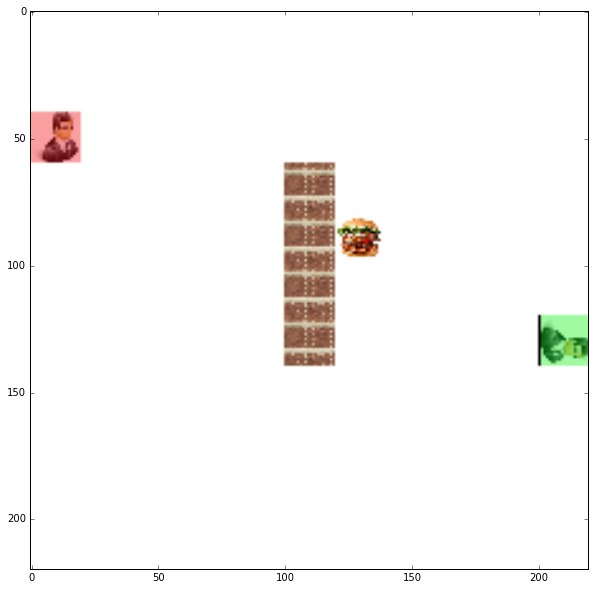

In [3]:
Start = time()
game.GenerateWorld()
Start = time()-Start
print Start
plt.figure(figsize=Settings.FigureSize)
plt.imshow(game.BuildImage())
#print game.world

In [4]:
rimages = []
tt = []
for i in range (100):
    Start = time()
    game.Step()
    gagnt.RandomAction(MRA=3)
    ragnt.DetectAndAstar()
    #bagnt.DetectAndAstar()
    tt.append(time()-Start)
    #t = np.concatenate([game.AgentViewPoint(ragnt.ID),game.AgentViewPoint(gagnt.ID)],axis=1)
    #rimages.append(t)
    rimages.append(game.BuildImage())
    print ragnt.Flateoutput().shape
    #print ragnt.NextAction,ragnt.CurrentReward, game.StepCounter, game.Terminated
    #print 'step:',game.StepCounter
    #print gagnt.NextAction,gagnt.CurrentReward
#Save Video
#Settings.ani_frame(rimages=rimages,fps=5)


(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)
(613,)


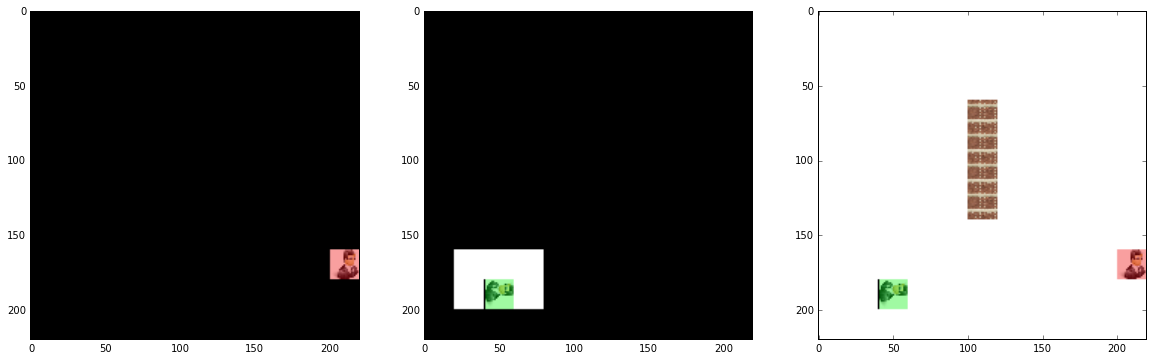

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(game.AgentViewPoint(1001))
plt.subplot(1,3,2)
plt.imshow(game.AgentViewPoint(1002))
plt.subplot(1,3,3)
plt.imshow(game.BuildImage())

ani_frame()

In [6]:
print ragnt.ID
for i in ragnt.NNFeed.keys():
    print i,ragnt.NNFeed[i].shape

1001
observed (11, 11)
mypos (11, 11)
myori (4,)
obstacles (11, 11)
food (11, 11)
agentpos1002 (11, 11)
agentori1002 (4,)
